In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy.misc
from sklearn.decomposition import PCA
from sklearn.svm import SVC
#import essentia, essentia.standard as ess

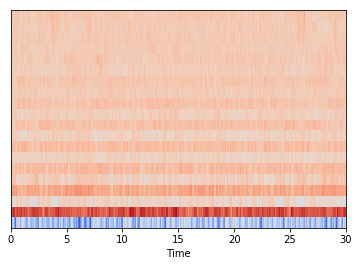

[ True False  True ...  True  True  True]


In [14]:
def mode1():
    char_gen=[]
    characteristics=[]
    i=0
    genre={}
    for folder in os.listdir("./genres"): #iterates all folders    
        cont=0

        folder="./genres/"+folder
        if not folder in genre.keys(): #creates a dictionary genre->number
            genre[folder]=i
            i+=1

        for filename in os.listdir(folder): #iterates all files in the folder
            filename = folder+"/"+filename

            if filename.endswith((".au",".mp3",".wav",".aiff")):
                audio, fs = librosa.load(filename, duration=30.0, mono=True, sr=22050) #loads the first 30 seconds of the song
                mfcc = librosa.feature.mfcc(audio, sr=fs) #calculates MFCC of the song
                #The size of the matrix will be number_of_MFCCs*1292, which is a feature every 0.02s
                #By default, it's 20*1922

                """The first comlumn gives useless information, so we remove it
                Works as offset"""
                mfcc = np.delete(mfcc, 0, axis=1)
                
                librosa.display.specshow(mfcc, x_axis='time')
                plt.show()

                mfcc=np.transpose(mfcc)
                mfcc=mfcc.flatten() #converts the matrix into a 1D array
                print mfcc<1.0

                char_gen.append((mfcc,genre[folder])) #adds the array to a list
                characteristics.append(mfcc) #adds the array to a list
                
            break
        break
        
mode1()

(20L, 1L)


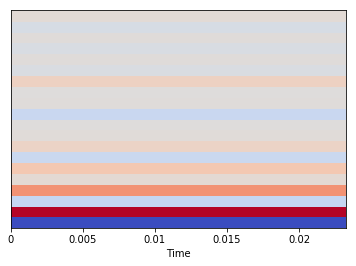

[-148.89129512  141.81222104  -27.89726807   73.7758307     3.48976665
   28.33642196  -23.07922991   14.33901286    0.37541975   -1.38066867
  -24.70011357   -0.28760375   -1.790959     17.34998905   -8.07458693
   -0.32218384   -8.08348733   -0.20889649  -10.9427574     2.49323869]
[ True False  True False  True False  True False  True  True  True  True
  True False  True  True  True  True  True  True]


In [35]:
def mode2():
    char_gen=[]
    characteristics=[]
    i=0
    genre={}
    for folder in os.listdir("./genres"): #iterates all folders    
        cont=0

        folder="./genres/"+folder
        if not folder in genre.keys(): #creates a dictionary genre->number
            genre[folder]=i
            i+=1

        for filename in os.listdir(folder): #iterates all files in the folder
            filename = folder+"/"+filename

            if filename.endswith((".au",".mp3",".wav",".aiff")):
                audio, fs = librosa.load(filename, duration=30.0, mono=True, sr=22050) #loads the first 30 seconds of the song
                mfcc = librosa.feature.mfcc(audio, sr=fs, n_fft=1024, hop_length=30*22050) #calculates MFCC of the song
                #The size of the matrix will be number_of_MFCCs*1292, which is a feature every 0.02s
                #By default, it's 20*1922

                """The first comlumn gives useless information, so we remove it
                Works as offset"""
                mfcc = np.delete(mfcc, 0, axis=1)
                print mfcc.shape
                
                librosa.display.specshow(mfcc, x_axis='time')
                plt.show()
                
                mfcc=mfcc.flatten() #converts the matrix into a 1D array
                print mfcc
                print mfcc<10.0

                char_gen.append((mfcc,genre[folder])) #adds the array to a list
                characteristics.append(mfcc) #adds the array to a list

                '''cont+=1
                if cont>=1:
                    break'''
            break
        break
mode2()

In [19]:
characteristics=[]
for folder in os.listdir("./genres"):
    folder="./genres/"+folder
    for filename in os.listdir(folder):
        filename = folder+"/"+filename
        if filename.endswith(".au"):
            audio, fs = librosa.load(filename)
            mfcc2 = librosa.feature.mfcc(audio, n_mfcc=5, sr=fs)
            characteristics.append(mfcc2)
            print mfcc2.shape
            librosa.display.specshow(mfcc2, x_axis='time') #Plot
            plt.colorbar()
            plt.tight_layout()
            break
        else:
            continue
    break

In [18]:
audio, fs = librosa.load("./genres/rock/rock.00000.au", duration=30)
S = librosa.feature.melspectrogram(y = audio, hop_length=fs/2) #generate as many values as we need
l = librosa.feature.mfcc(y = audio, n_mfcc=5, S=librosa.power_to_db(S)) #calculate MFCC
l = np.delete(l, 0, axis=1) #first column gives meaningless information
print l.shape
scipy.misc.toimage(l).save('./genres/rock/rock.00000.png')
librosa.display.specshow(l,  x_axis='time') #Plot
plt.colorbar()
plt.tight_layout()

(5L, 60L)


C:\Users\Ralleg314\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


In [28]:
sklearn.svm.SVC(characteristics)

SVC(C=[array([-2.08945e+02, -1.93909e+02, ..., -7.55534e+00, -3.09800e-02]), array([-223.67753, -156.06528, ...,   -5.80774,   -4.40837]), array([-71.44897, -96.38281, ...,  -4.05437, -13.66373]), array([-196.83621, -213.41225, ...,   -7.66449,   -7.50039]), array([-180.03837, -155.01845, ...,  -22.8666....67261, ...,   -2.97236,   -7.40131]), array([-281.51549, -302.4701 , ...,   -4.57553,   -3.76044])],
  cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)